In [ ]:
## 1. Pull btc related tweets from Mark Cuban and Plan B and store them in csv files.

In [2]:
# Import twint and nest asyncio in order to scrape tweets based on specific search criteria
import twint
import nest_asyncio

In [3]:
# Run nest asyncio to enable concurrent actions and avoid runtime error
nest_asyncio.apply()

In [4]:
# Define search criteria to pull btc related tweets from Marck Cuban
## Dates are set using trial and error since twint only returns a certain number of tweets at a time
search_criteria = "btc (from:mcuban) until:2021-06-03 since:2020-10-10"
# Configure twint instance, including writing data to a csv
c = twint.Config()
c.Search = search_criteria
c.Store_csv = True
c.Output = "mcuban.csv"

# Run twint instance saving data to csv
twint.run.Search(c)

#Rename csv file per dates pulled from twitter, update search criteria above accordingly, and re-run twint instance

1393673151691755521 2021-05-15 16:02:27 -0500 <mcuban> @ANANDDB I never was anti crypto. Ive owned it for years. What I said was that btc had little utility other than as a store of value. What am I talking about now? Utility. And I don’t shill anything.  I said doge was better than a lottery ticket. Then people started using it to buy things
1392611938983632896 2021-05-12 17:45:34 -0500 <mcuban> We at  https://t.co/VUydpLFzGh will continue to accept BTC/Eth/Doge because we know that replacing Gold as a store of value will help the environment   https://t.co/bs7NvnJY8A and   https://t.co/ELhbuLOBRV shrinking big bank and coin usage will benefit society and the environment
1389006710795296769 2021-05-02 18:59:41 -0500 <mcuban> @spindel5 I still don't like btc as a currency. That's always been the issue.  And people aren't using it as currency. No one really buys anything with it. Would you spend your btc ?
1389004112654655489 2021-05-02 18:49:21 -0500 <mcuban> Crypto succeeds when it's 

In [5]:
# Define search criteria to pull btc related tweets from PlanB
## Dates are set using trial and error since twint only returns a certain number of tweets at a time
search_criteria = "btc (from:100trillionUSD) until:2021-02-05 since:2020-10-10"
# Configure twint instance, including writing data to a csv
c = twint.Config()
c.Search = search_criteria
c.Store_csv = True
c.Output = "planb.csv"

# Run twint instance saving data to csv
twint.run.Search(c)

#Rename csv file per dates pulled from twitter, update search criteria above accordingly, and re-run twint instance

1357304428861267969 2021-02-04 06:26:07 -0500 <100trillionUSD> @KellerTrading BTC is the real thing, #bitcoin  BCH is a scam, and so is BSV. Like many of the scammers that comment under this tweet with free airdrops and giveaways, ignore, delete, block BCH and BSV.
1356283916995485701 2021-02-01 10:50:59 -0500 <100trillionUSD> @AlvaroMusach @mir_btc @RadarRayne Yes, the first chart has more emotional charge for me because it has the eureka moment energy. The second chart is "scientifically" more evolved, the state of the art.
1356280711301509129 2021-02-01 10:38:14 -0500 <100trillionUSD> @AlvaroMusach @mir_btc @RadarRayne First chart with 2 lines/formulae was the first incarnation, the eureka moment, S2FX model in the making  Later I was able to merge the 2 formulae into 1, S2FX model. Silver was based on wrong data in the first chart, diamond investors improved diamond S2F and I disregarded S2F&lt;1
1356256824119484418 2021-02-01 09:03:19 -0500 <100trillionUSD> @mir_btc @RadarRayne 🙏 

In [6]:
# Import pandas to manipulate data
import pandas as pd

In [7]:
# Read all csv's containing btc tweets from mcuban and combine them into one dataframe
mcuban_btc_1 = pd.read_csv('mcuban btc 05152021-12182020.csv')
mcuban_btc_2 = pd.read_csv('mcuban btc 09172021-06032021.csv')
mcuban_btc_tweets = pd.concat([mcuban_btc_2, mcuban_btc_1])
# Write final dataframe to csv
mcuban_btc_tweets.to_csv('mcuban_btc_tweets.csv', index=False)

In [8]:
# Read all csv's containing btc tweets from PlanB and combine them into one dataframe
planb_btc_1 = pd.read_csv('planb btc 02052021-10152020.csv')
planb_btc_2 = pd.read_csv('planb btc 04112021-02142021.csv')
planb_btc_3 = pd.read_csv('planb btc 09282021-04132021.csv')
planb_btc_tweets = pd.concat([planb_btc_3, planb_btc_2, planb_btc_1])
# Write final dataframe to csv
planb_btc_tweets.to_csv('planb_btc_tweets.csv', index=False)

In [9]:
## 2. Clean data and run sentiment analysis on tweets.

In [10]:
# Load csv with all of Mark Cuban's btc tweets into a dataframe
mcuban_btc = pd.read_csv('mcuban_btc_tweets.csv')
mcuban_btc.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1439061911232933889,1439061911232933889,2021-09-17 22:01:10 Central Daylight Time,2021-09-17,22:01:10,-500,16228398,mcuban,Mark Cuban,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1427050797242662913,1426600841650319367,2021-08-15 18:33:18 Central Daylight Time,2021-08-15,18:33:18,-500,16228398,mcuban,Mark Cuban,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GoingParabolic', 'name': 'Ja...",NaN,NaN,NaN,NaN
2,1427050023552966665,1426600841650319367,2021-08-15 18:30:13 Central Daylight Time,2021-08-15,18:30:13,-500,16228398,mcuban,Mark Cuban,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GoingParabolic', 'name': 'Ja...",NaN,NaN,NaN,NaN
3,1427048363762061312,1426600841650319367,2021-08-15 18:23:37 Central Daylight Time,2021-08-15,18:23:37,-500,16228398,mcuban,Mark Cuban,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GoingParabolic', 'name': 'Ja...",NaN,NaN,NaN,NaN
4,1426998624341405702,1426600841650319367,2021-08-15 15:05:59 Central Daylight Time,2021-08-15,15:05:59,-500,16228398,mcuban,Mark Cuban,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GoingParabolic', 'name': 'Ja...",NaN,NaN,NaN,NaN


In [11]:
# Change index to date of the tweet
mcuban_btc.set_index('date', inplace = True)
mcuban_btc_tweets = mcuban_btc["tweet"]
mcuban_btc_tweets.head()

date
2021-09-17    Any one else notice how the BTC Maxis that scr...
2021-08-15    @GoingParabolic @DarinFeinstein @gladstein @Ch...
2021-08-15    @GoingParabolic @DarinFeinstein @gladstein @Ch...
2021-08-15    @GoingParabolic @DarinFeinstein @gladstein @Ch...
2021-08-15    @GoingParabolic @DarinFeinstein @gladstein @Ch...
Name: tweet, dtype: object

In [12]:
# Import modules for sentiment analysis

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Schmidt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
#Loop through the tweets using sentiment analysis and append to a list

#Set list and count variable
mcuban_btc_sentiment = []
count = 0

for tweet in mcuban_btc_tweets:
    try:
        date = mcuban_btc_tweets.index[count]
        sentiment = analyzer.polarity_scores(tweet)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        mcuban_btc_sentiment.append({
            "tweet": tweet,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu})
        count += 1
        
    except AttributeError:
        pass

#Turn the sentiment list into a date frame
mcuban_btc_sentiment = pd.DataFrame(mcuban_btc_sentiment)   
mcuban_btc_sentiment

,tweet,date,compound,positive,negative,neutral
0,Any one else notice how the BTC Maxis that scr...,2021-09-17,-0.3400,0.031,0.064,0.905
1,@GoingParabolic @DarinFeinstein @gladstein @Ch...,2021-08-15,0.6478,0.198,0.086,0.716
2,@GoingParabolic @DarinFeinstein @gladstein @Ch...,2021-08-15,0.8440,0.232,0.057,0.712
3,@GoingParabolic @DarinFeinstein @gladstein @Ch...,2021-08-15,-0.5187,0.028,0.067,0.905
4,@GoingParabolic @DarinFeinstein @gladstein @Ch...,2021-08-15,0.2960,0.065,0.029,0.906
...,...,...,...,...,...,...
178,@jhamel It's actually late. More than 85pct of...,2020-12-18,0.2500,0.087,0.000,0.913
179,@JackHar10524114 @MrHodl @AlanFreestone @glads...,2020-12-18,-0.1531,0.095,0.136,0.769
180,@_ConnerBrown_ Spoiler alert: btc is not suppo...,2020-12-18,0.5719,0.320,0.000,0.680
181,@Alexwashere @gladstein And they all value tha...,2020-12-18,0.3400,0.118,0.000,0.882


In [14]:
# Load csv with all of Pan B's btc tweets into a dataframe
planb_btc = pd.read_csv('planb_btc_tweets.csv')
planb_btc.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442780340276367362,1442772744450592771,2021-09-28 04:16:53 Central Daylight Time,2021-09-28,04:16:53,-500,918804624303382528,100trillionusd,PlanB,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CryptoExpoDan', 'name': 'Cry...",NaN,NaN,NaN,NaN
1,1441343203475542028,1441335732895825924,2021-09-24 05:06:13 Central Daylight Time,2021-09-24,05:06:13,-500,918804624303382528,100trillionusd,PlanB,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NoSleepTrader', 'name': 'Nos...",NaN,NaN,NaN,NaN
2,1440963275664072704,1440806159955365895,2021-09-23 03:56:31 Central Daylight Time,2021-09-23,03:56:31,-500,918804624303382528,100trillionusd,PlanB,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DatCryptoBoi', 'name': 'DatC...",NaN,NaN,NaN,NaN
3,1438411395893239808,1438153029052678159,2021-09-16 02:56:15 Central Daylight Time,2021-09-16,02:56:15,-500,918804624303382528,100trillionusd,PlanB,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CarlesMassa', 'name': 'Carlo...",NaN,NaN,NaN,NaN
4,1438161216128622594,1438153029052678159,2021-09-15 10:22:08 Central Daylight Time,2021-09-15,10:22:08,-500,918804624303382528,100trillionusd,PlanB,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BTC_Archive', 'name': 'Bitco...",NaN,NaN,NaN,NaN


In [15]:
# Change index to date of the tweet
planb_btc.set_index('date', inplace = True)
planb_btc_tweets = planb_btc["tweet"]
planb_btc_tweets.head()

date
2021-09-28    @CryptoExpoDan S2F target of 100k is an averag...
2021-09-24    @NoSleepTrader Yeah bitcoin pumped too hard, I...
2021-09-23    @DatCryptoBoi @intocryptoverse Correct, but in...
2021-09-16                   @CarlesMassa @BTC_Archive Et voila
2021-09-15    @BTC_Archive Yes, and they closed the exits, t...
Name: tweet, dtype: object

In [16]:
# Turn list of tweets back into a dataframe
planb_btc_tweets_df = pd.DataFrame(planb_btc_tweets)   
planb_btc_tweets_df

,tweet
date,
2021-09-28,@CryptoExpoDan S2F target of 100k is an averag...
2021-09-24,"@NoSleepTrader Yeah bitcoin pumped too hard, I..."
2021-09-23,"@DatCryptoBoi @intocryptoverse Correct, but in..."
2021-09-16,@CarlesMassa @BTC_Archive Et voila
2021-09-15,"@BTC_Archive Yes, and they closed the exits, t..."
...,...
2020-10-19,@antanst The cost (capex and opex) of 51% BTC ...
2020-10-19,@PeterAngel2019 BTC price is in its 3rd best m...
2020-10-17,@CarbonSteed thank you. it could also be stuff...


In [17]:
#Loop through the tweets using sentiment analysis and append to a list

#Set list and count variable
planb_btc_sentiment = []
count = 0

for tweet in planb_btc_tweets:
    try:
        date = planb_btc_tweets.index[count]
        sentiment = analyzer.polarity_scores(tweet)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        planb_btc_sentiment.append({
            "tweet": tweet,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu})
        count += 1
        
    except AttributeError:
        pass

#Turn the sentiment list into a date frame
planb_btc_sentiment = pd.DataFrame(planb_btc_sentiment)   
planb_btc_sentiment

,tweet,date,compound,positive,negative,neutral
0,@CryptoExpoDan S2F target of 100k is an averag...,2021-09-28,-0.3400,0.059,0.116,0.825
1,"@NoSleepTrader Yeah bitcoin pumped too hard, I...",2021-09-24,0.5859,0.230,0.062,0.708
2,"@DatCryptoBoi @intocryptoverse Correct, but in...",2021-09-23,0.4497,0.059,0.000,0.941
3,@CarlesMassa @BTC_Archive Et voila,2021-09-16,0.0000,0.000,0.000,1.000
4,"@BTC_Archive Yes, and they closed the exits, t...",2021-09-15,0.4019,0.109,0.000,0.891
...,...,...,...,...,...,...
378,@antanst The cost (capex and opex) of 51% BTC ...,2020-10-19,-0.6486,0.000,0.155,0.845
379,@PeterAngel2019 BTC price is in its 3rd best m...,2020-10-19,0.6696,0.333,0.000,0.667
380,@CarbonSteed thank you. it could also be stuff...,2020-10-17,0.6124,0.156,0.000,0.844
381,❓Why does #bitcoin price not go up with all th...,2020-10-16,0.0000,0.000,0.000,1.000


In [18]:
# 3. Pull btc price data and combine with tweet sentiment data

In [19]:
# Import datetime and pandas data reader for getting data from yahoo finance
import datetime as dt
import pandas_datareader as pdr

# Pull btc price data from yahoo finance
start = dt.datetime(2020,10,10)
end = dt.datetime(2021,10,10)
btc_df = pdr.DataReader('BTC-USD','yahoo',start,end)
btc_df['returns'] = btc_df['Close'].pct_change() * 100
btc_df['lagged_returns'] = btc_df['returns'].shift()
btc_df = btc_df.dropna()
btc_df.tail()

,High,Low,Open,Close,Volume,Adj Close,returns,lagged_returns
Date,,,,,,,,
2021-10-06,55338.625000,53525.468750,55338.625000,53805.984375,3.680786e+10,53805.984375,-2.809653,7.467050
2021-10-07,55922.980469,53688.054688,53802.144531,53967.847656,3.480087e+10,53967.847656,0.300828,-2.809653
2021-10-08,55397.945312,53735.144531,53929.781250,54968.222656,3.249121e+10,54968.222656,1.853650,0.300828
2021-10-09,56401.304688,54264.257812,54952.820312,54771.578125,3.952779e+10,54771.578125,-0.357742,1.853650
2021-10-10,57793.039062,54519.765625,54734.125000,57484.789062,4.263733e+10,57484.789062,4.953684,-0.357742


In [20]:
# Combine mcuban's btc tweets with sentiment data and btc price data

# Load csv with all of Mark Cuban's btc tweets into a dataframe
mcuban_btc_tweet_data = pd.read_csv('mcuban_btc_tweets.csv')
# Set index to date
mcuban_btc_tweet_data.set_index('date', inplace = True)
# Drop columns not used for features
columns_to_drop = ['id', 'conversation_id', 'created_at', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls', 'photos', 'hashtags', 'cashtags', 
                   'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
mcuban_btc_tweet_data = mcuban_btc_tweet_data.drop(columns = columns_to_drop)

#Set index on sentiement dataframe to date
mcuban_btc_sentiment.set_index('date', inplace = True)
#Drop tweet column from this dataframe
mcuban_btc_sentiment = mcuban_btc_sentiment.drop(columns = 'tweet')

# Join tweet data with sentiment data
mcuban_btc_sentiment_X = pd.concat([mcuban_btc_tweet_data, mcuban_btc_sentiment], axis = 1)
mcuban_btc_sentiment_X

,replies_count,retweets_count,likes_count,compound,positive,negative,neutral
date,,,,,,,
2021-09-17,1599,631,7548,-0.3400,0.031,0.064,0.905
2021-08-15,10,2,26,0.6478,0.198,0.086,0.716
2021-08-15,4,1,13,0.8440,0.232,0.057,0.712
2021-08-15,8,2,26,-0.5187,0.028,0.067,0.905
2021-08-15,44,20,169,0.2960,0.065,0.029,0.906
...,...,...,...,...,...,...,...
2020-12-18,99,7,46,0.2500,0.087,0.000,0.913
2020-12-18,29,1,13,-0.1531,0.095,0.136,0.769
2020-12-18,3,0,2,0.5719,0.320,0.000,0.680


In [21]:
# Join btc price data frame to mcuban btc tweets dataframe
mcuban_btc_X = mcuban_btc_sentiment_X.join(btc_df, how = 'inner')
mcuban_btc_X

,replies_count,retweets_count,likes_count,compound,positive,negative,neutral,High,Low,Open,Close,Volume,Adj Close,returns,lagged_returns
2020-12-18,10,1,13,0.8047,0.154,0.028,0.818,23238.601562,22399.812500,22806.796875,23137.960938,4.038790e+10,23137.960938,1.459314,7.013245
2020-12-18,5,1,7,0.5040,0.107,0.035,0.858,23238.601562,22399.812500,22806.796875,23137.960938,4.038790e+10,23137.960938,1.459314,7.013245
2020-12-18,11,0,5,0.2500,0.306,0.194,0.500,23238.601562,22399.812500,22806.796875,23137.960938,4.038790e+10,23137.960938,1.459314,7.013245
2020-12-18,14,0,10,0.1002,0.108,0.100,0.792,23238.601562,22399.812500,22806.796875,23137.960938,4.038790e+10,23137.960938,1.459314,7.013245
2020-12-18,3,0,0,0.6124,0.143,0.000,0.857,23238.601562,22399.812500,22806.796875,23137.960938,4.038790e+10,23137.960938,1.459314,7.013245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15,50,19,130,0.5574,0.093,0.000,0.907,47998.097656,45700.320312,47019.960938,46004.484375,3.277688e+10,46004.484375,-2.215911,-0.106040
2021-09-17,1599,631,7548,-0.3400,0.031,0.064,0.905,48791.781250,47087.285156,47273.527344,48278.363281,2.857563e+10,48278.363281,2.138559,-1.079539
2021-09-17,1599,631,7548,-0.3400,0.031,0.064,0.905,48791.781250,47087.285156,47273.527344,48278.363281,2.857563e+10,48278.363281,2.138559,-1.079539
2021-09-17,1599,631,7548,-0.3400,0.031,0.064,0.905,48791.781250,47087.285156,47273.527344,48278.363281,2.857563e+10,48278.363281,2.138559,-1.079539


In [22]:
# Combine planb's btc tweets with sentiment data and btc price data

# Load csv with all of Mark Cuban's btc tweets into a dataframe
planb_btc_tweet_data = pd.read_csv('planb_btc_tweets.csv')
# Set index to date
planb_btc_tweet_data.set_index('date', inplace = True)
# Drop columns not used for features
planb_btc_tweet_data = planb_btc_tweet_data.drop(columns = columns_to_drop)

#Set index on sentiement dataframe to date
planb_btc_sentiment.set_index('date', inplace = True)
#Drop tweet column from this dataframe
planb_btc_sentiment = planb_btc_sentiment.drop(columns = 'tweet')

# Join tweet data with sentiment data
planb_btc_sentiment_X = pd.concat([planb_btc_tweet_data, planb_btc_sentiment], axis = 1)
planb_btc_sentiment_X

,replies_count,retweets_count,likes_count,compound,positive,negative,neutral
date,,,,,,,
2021-09-28,3,12,252,-0.3400,0.059,0.116,0.825
2021-09-24,23,5,256,0.5859,0.230,0.062,0.708
2021-09-23,1,0,28,0.4497,0.059,0.000,0.941
2021-09-16,1,0,4,0.0000,0.000,0.000,1.000
2021-09-15,19,35,702,0.4019,0.109,0.000,0.891
...,...,...,...,...,...,...,...
2020-10-19,2,0,55,-0.6486,0.000,0.155,0.845
2020-10-19,1,4,86,0.6696,0.333,0.000,0.667
2020-10-17,1,1,13,0.6124,0.156,0.000,0.844


In [23]:
# Join btc price data frame to mcuban btc tweets dataframe
planb_btc_X = planb_btc_sentiment_X.join(btc_df, how = 'inner')
planb_btc_X

,replies_count,retweets_count,likes_count,compound,positive,negative,neutral,High,Low,Open,Close,Volume,Adj Close,returns,lagged_returns
2020-10-15,20,56,524,0.8360,0.223,0.000,0.777,11540.061523,11223.012695,11502.828125,11322.123047,2.563548e+10,11322.123047,-1.506927,0.576077
2020-10-16,234,620,3665,0.0000,0.000,0.000,1.000,11386.261719,11285.345703,11322.123047,11358.101562,1.913043e+10,11358.101562,0.317772,-1.506927
2020-10-17,1,1,13,0.6124,0.156,0.000,0.844,11483.359375,11347.578125,11355.982422,11483.359375,1.828331e+10,11483.359375,1.102806,0.317772
2020-10-19,2,0,55,-0.6486,0.000,0.155,0.845,11999.917969,11681.480469,11745.974609,11916.334961,3.091582e+10,11916.334961,1.484392,2.252631
2020-10-19,1,4,86,0.6696,0.333,0.000,0.667,11999.917969,11681.480469,11745.974609,11916.334961,3.091582e+10,11916.334961,1.484392,2.252631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,6,9,205,0.0000,0.000,0.000,1.000,55568.464844,50488.191406,51486.664062,55361.449219,4.903473e+10,55361.449219,7.467050,4.890589
2021-10-05,70,39,2000,0.4199,0.411,0.000,0.589,55568.464844,50488.191406,51486.664062,55361.449219,4.903473e+10,55361.449219,7.467050,4.890589
2021-10-05,6,9,205,0.0000,0.000,0.000,1.000,55568.464844,50488.191406,51486.664062,55361.449219,4.903473e+10,55361.449219,7.467050,4.890589
2021-10-07,13,1,94,0.0000,0.000,0.000,1.000,55922.980469,53688.054688,53802.144531,53967.847656,3.480087e+10,53967.847656,0.300828,-2.809653


In [24]:
# 4. Set up and run machine learning algorithms (basic keras and multiple input keras)

In [25]:
# Define features (X) by selecting the appropriate tweet data columns
X1 = mcuban_btc_X[['replies_count', 'retweets_count', 'likes_count', 'compound']]
X2 = planb_btc_X[['replies_count', 'retweets_count', 'likes_count', 'compound']]
# Define output (y) by selecting returns
y1 = mcuban_btc_X['lagged_returns'].values
y2 = planb_btc_X['lagged_returns'].values

In [26]:
# Import train test split, sclaing, machine learning models and analysis tools
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

In [27]:
# Split data into Train and Test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=10)

In [28]:
#  Define the pipeline for scaling and model fitting
linear_model = Pipeline([("MinMax Scaling", MinMaxScaler()), ("Linear Regression", LinearRegression())])

sgd_model = Pipeline([("MinMax Scaling", MinMaxScaler()), ("SGD Regression", SGDRegressor())])

In [29]:
# Fit the pipeline with the training data for both models
linear_model.fit(X1_train, y1_train)
sgd_model.fit(X1_train, y1_train)

linear_model.fit(X2_train, y2_train)
sgd_model.fit(X2_train, y2_train)

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression', SGDRegressor())])

In [30]:
# Predicting target for both models
y1_pred_linear = linear_model.predict(X1_test)
y1_pred_sgd = sgd_model.predict(X1_test)

y2_pred_linear = linear_model.predict(X2_test)
y2_pred_sgd = sgd_model.predict(X2_test)

In [41]:
# Checking score and absolute error for mcuban tweets
print('Mark Cuban Sentiment Model:')
print('Pipeline 1 Mean Absolute Error for Linear Regression: ', mean_absolute_error(y1_pred_linear, y1_test))
print('Pipeline 1 Score for Linear Regression', linear_model.score(X1_test, y1_test))
print('Pipeline 2 Mean Absolute Error for SGD Regression: ', mean_absolute_error(y1_pred_sgd, y1_test))
print('Pipeline 2 Score for SGD Regression', sgd_model.score(X1_test, y1_test))
# Checking score and absolute error for planb tweets
print('PlanB Sentiment Model:')
print('Pipeline 1 Mean Absolute Error for Linear Regression: ', mean_absolute_error(y2_pred_linear, y2_test))
print('Pipeline 1 Score for Linear Regression', linear_model.score(X2_test, y2_test))
print('Pipeline 2 Mean Absolute Error for SGD Regression: ', mean_absolute_error(y2_pred_sgd, y2_test))
print('Pipeline 2 Score for SGD Regression', sgd_model.score(X2_test, y2_test))

Mark Cuban Sentiment Model:
Pipeline 1 Mean Absolute Error for Linear Regression:  4.959346407117332
Pipeline 1 Score for Linear Regression -0.10405792338695496
Pipeline 2 Mean Absolute Error for SGD Regression:  4.751273932764061
Pipeline 2 Score for SGD Regression -0.050679666666174183
PlanB Sentiment Model:
Pipeline 1 Mean Absolute Error for Linear Regression:  3.443159673835962
Pipeline 1 Score for Linear Regression -0.03570199757066761
Pipeline 2 Mean Absolute Error for SGD Regression:  3.380995646610424
Pipeline 2 Score for SGD Regression -0.008618582632169192


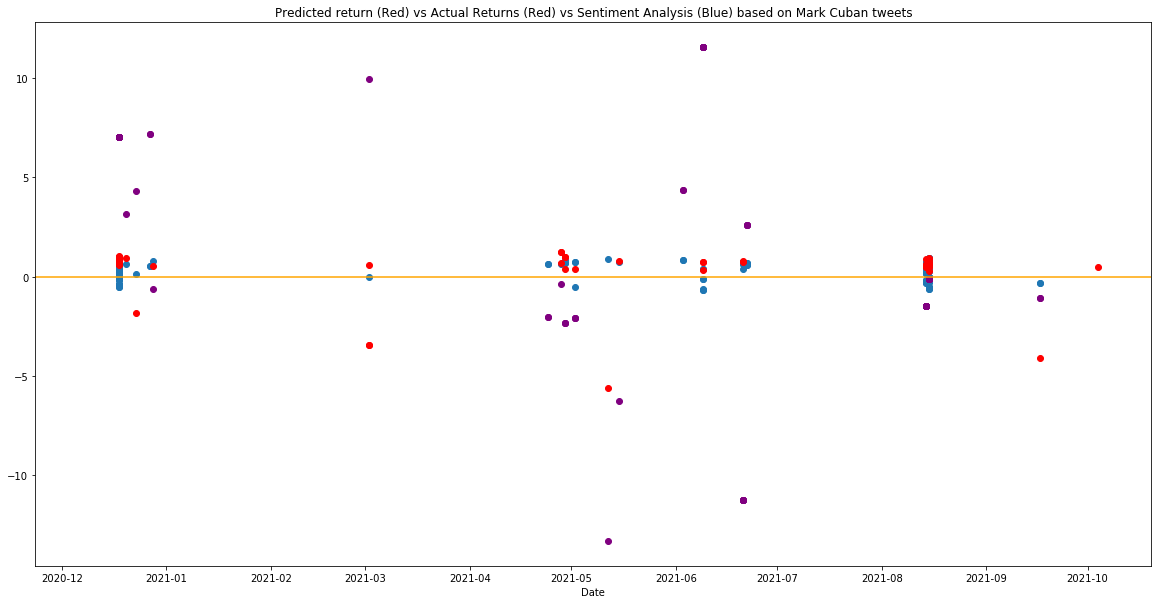

In [37]:
# Graph sentiment score against predicted for linear regression model of mcuban tweets  
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(X1_train.index, X1_train['compound']) 
plt.scatter(X1_train.index, y1_train, color = 'purple')
plt.scatter(X1_test.index, y1_pred_linear, color='red')
plt.axhline(0, color = 'orange')
plt.xlabel('Date')
plt.title('Predicted return (Red) vs Actual Returns (Red) vs Sentiment Analysis (Blue) based on Mark Cuban tweets')
plt.savefig('Mark_Cuban_Tweet_BTC_Returns_Linear.png')

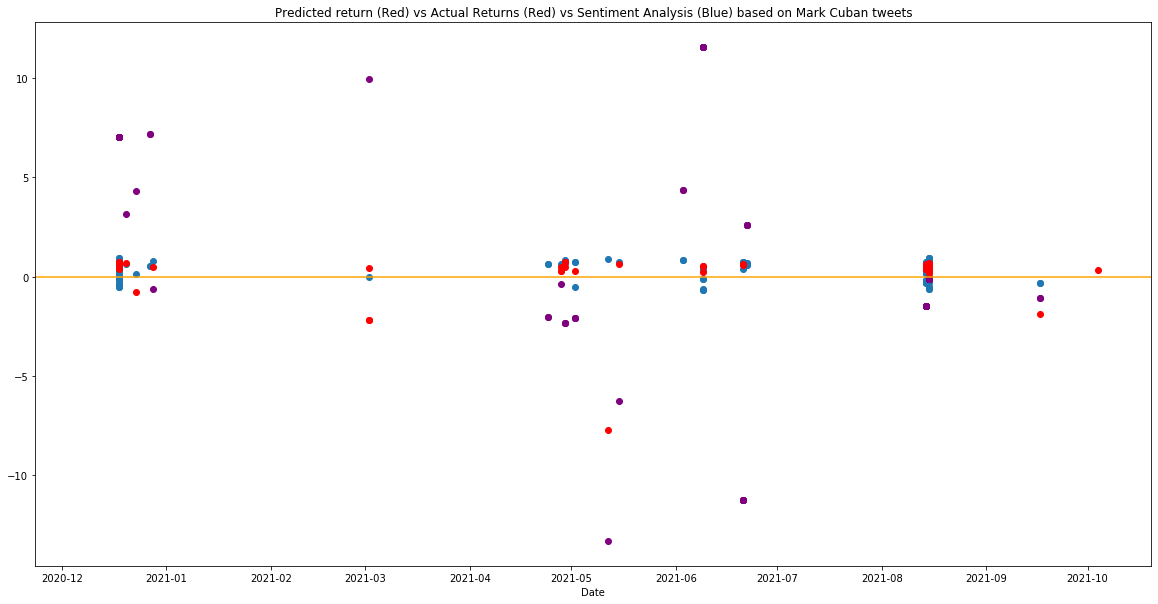

In [38]:
# Graph sentiment score against predicted for sgd regression model of mcuban tweets  
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(X1_train.index, X1_train['compound']) 
plt.scatter(X1_train.index, y1_train, color = 'purple')
plt.scatter(X1_test.index, y1_pred_sgd, color='red')
plt.axhline(0, color = 'orange')
plt.xlabel('Date')
plt.title('Predicted return (Red) vs Actual Returns (Red) vs Sentiment Analysis (Blue) based on Mark Cuban tweets')
plt.savefig('Mark_Cuban_Tweet_BTC_Returns_SGD.png')

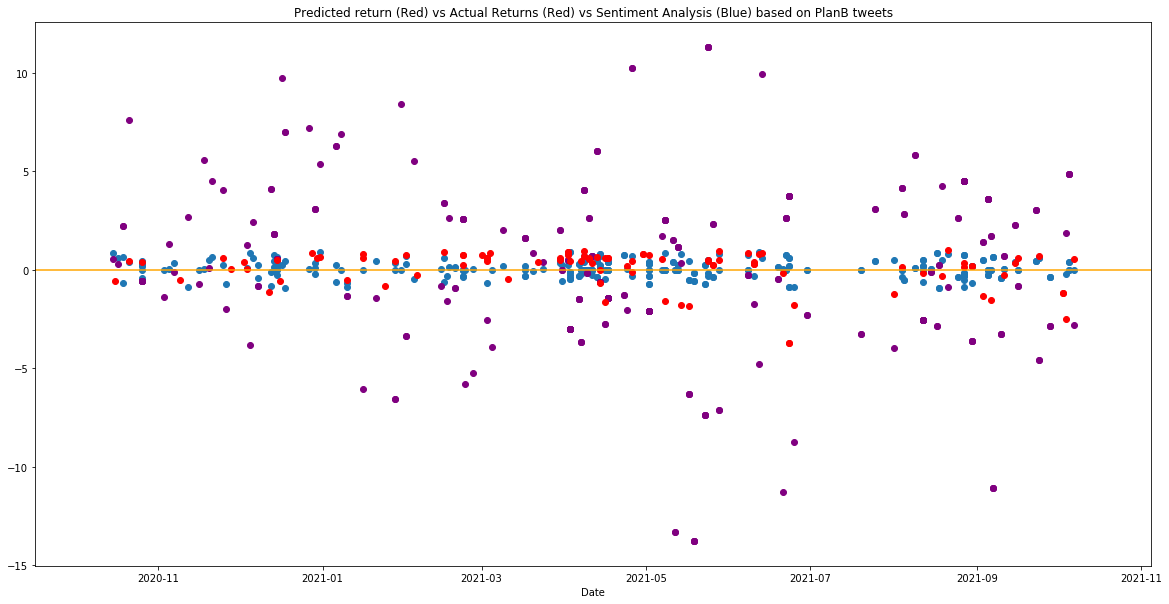

In [39]:
# Graph sentiment score against predicted for linear regression model of planb tweets  
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(X2_train.index, X2_train['compound']) 
plt.scatter(X2_train.index, y2_train, color = 'purple')
plt.scatter(X2_test.index, y2_pred_linear, color='red')
plt.axhline(0, color = 'orange')
plt.xlabel('Date')
plt.title('Predicted return (Red) vs Actual Returns (Red) vs Sentiment Analysis (Blue) based on PlanB tweets')
plt.savefig('Panb_Tweet_BTC_Returns_Linear.png')

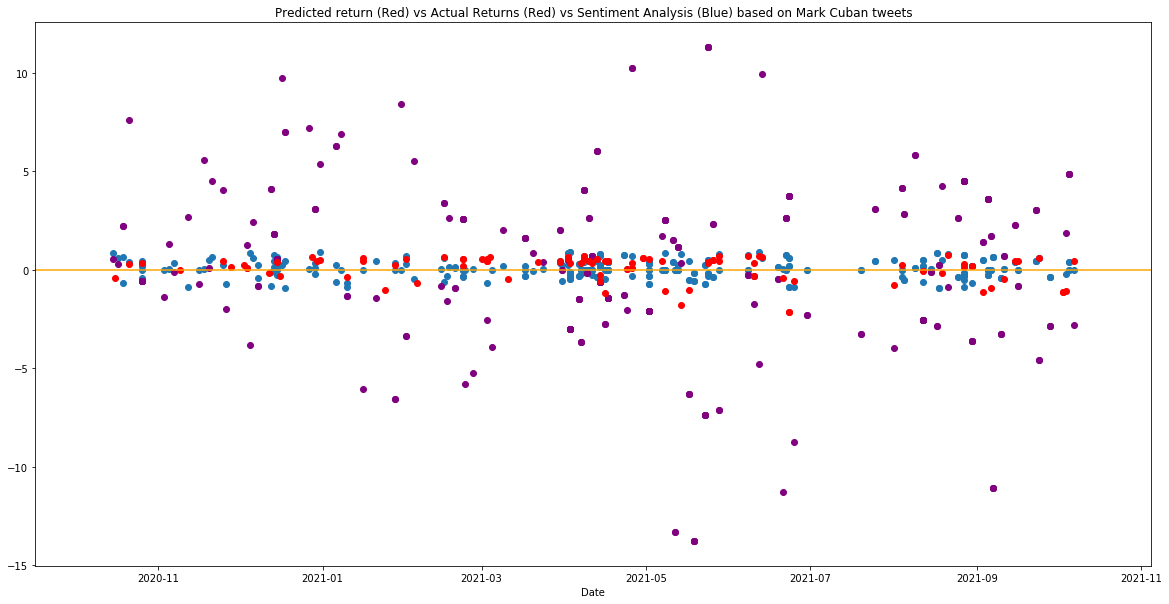

In [40]:
# Graph sentiment score against predicted for sgd regression model of mcuban tweets  
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(X2_train.index, X2_train['compound']) 
plt.scatter(X2_train.index, y2_train, color = 'purple')
plt.scatter(X2_test.index, y2_pred_sgd, color='red')
plt.axhline(0, color = 'orange')
plt.xlabel('Date')
plt.title('Predicted return (Red) vs Actual Returns (Red) vs Sentiment Analysis (Blue) based on Mark Cuban tweets')
plt.savefig('Planb_Tweet_BTC_Returns_SGD.png')